# Import modules

In [1]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)
from keras.layers import Input, Dense
from keras.models import Model       
from keras.layers.merge import concatenate
import numpy as np
from keras import optimizers
import time 
import random

import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import seaborn as sns
import colorsys
from sklearn.utils import shuffle
from sklearn import preprocessing



C:\Users\O136114O\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\O136114O\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\O136114O\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\O136114O\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWa

# Read data from file and store it in a dataframe

In [2]:
col_names = ['unit', 'cycle', 'os1', 'os2', 'os3']
for i in range(1,26):
    col_names.append('sm'+str(i))
col_names


['unit',
 'cycle',
 'os1',
 'os2',
 'os3',
 'sm1',
 'sm2',
 'sm3',
 'sm4',
 'sm5',
 'sm6',
 'sm7',
 'sm8',
 'sm9',
 'sm10',
 'sm11',
 'sm12',
 'sm13',
 'sm14',
 'sm15',
 'sm16',
 'sm17',
 'sm18',
 'sm19',
 'sm20',
 'sm21',
 'sm22',
 'sm23',
 'sm24',
 'sm25']

In [3]:
df = pd.read_table('train.txt', sep = ' ',names = col_names)
# df.dropna(axis=1, how='any', inplace=True)
df.head()

,unit,cycle,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm16,sm17,sm18,sm19,sm20,sm21,sm22,sm23,sm24,sm25
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,0.03,368,2319,100.0,28.58,17.1735,NaN,NaN,NaN,NaN
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,0.03,391,2388,100.0,38.99,23.3619,NaN,NaN,NaN,NaN
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,0.02,334,2223,100.0,14.83,8.8555,NaN,NaN,NaN,NaN
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,0.02,364,2324,100.0,24.42,14.7832,NaN,NaN,NaN,NaN
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,0.02,330,2212,100.0,10.99,6.4025,NaN,NaN,NaN,NaN


In [4]:
df['cycle'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
# tst = df.loc[df['unit'] == 1]

# tst['cycle'].unique()

# #---------------- Remarque


# Data preparation
## Creating RUL column 

In [6]:
max_cycle_per_unit = {}
for unit in df['unit'].unique():
    max_cycle_per_unit[unit] = df['cycle'].loc[df['unit'] == unit].max()
    
# calculate RUL = time.max() - time_now for each unit
df['RUL'] = df['unit'].apply(lambda nr: max_cycle_per_unit[nr]) - df['cycle']

## Drop the nan columns and rows 

In [7]:
cols_nan = df.columns[df.isna().any()].tolist()
print('Columns with all nan: \n' + str(cols_nan) + '\n')

cols_const = [ col for col in df.columns if len(df[col].unique()) <= 2 ]
print('Columns with all const values: \n' + str(cols_const) + '\n')

Columns with all nan: 
['sm22', 'sm23', 'sm24', 'sm25']

Columns with all const values: 
['sm16', 'sm19', 'sm22', 'sm23', 'sm24', 'sm25']



In [8]:
df = df.drop(columns=cols_const + cols_nan)
df.head()

,unit,cycle,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm11,sm12,sm13,sm14,sm15,sm17,sm18,sm20,sm21,RUL
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,45.40,372.15,2388.13,8120.83,8.6216,368,2319,28.58,17.1735,222
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,47.29,521.81,2388.15,8132.87,8.3907,391,2388,38.99,23.3619,221
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,41.92,183.26,2387.95,8063.84,9.3557,334,2223,14.83,8.8555,220
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,44.26,314.84,2388.07,8052.30,9.2231,364,2324,24.42,14.7832,219
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,41.79,130.44,2387.89,8083.67,9.2986,330,2212,10.99,6.4025,218


### Ploting func by RUL

In [9]:
# def plot_grouped_by_RUL(df_sub, leg=True, cols_data=None):

#     g = sns.PairGrid(data=df_sub, x_vars="RUL", y_vars=cols_data,hue="unit", height=2, aspect=6,)
#     g = g.map(plt.plot, alpha=0.5)
#     g = g.set(xlim=(df_sub['RUL'].max(),df_sub['RUL'].min()))
#     if leg:
#         g = g.add_legend()

### Ploting by RUL  before rolling
x : RUL.

y : Raw data mesured by sensor

In [10]:
# df_old = df.copy()

# cols = [c for c in df.columns if c.startswith('s') or c in ['RUL', 'unit']]
# plot_grouped_by_RUL(df_old[cols].copy(), True ,cols)


### Ploting by RUL  after rolling
####  Perform an averaging with a floating average window of size 10 to smoothen out the signal noise

In [11]:

def rolling_mean_by_unit(df, n, verbose=False):
    cols_sensors = [c for c in df.columns if c.startswith('s') ]
    df_new = df.copy()
    unit_nrs = df['unit'].unique()
    
    for nr in unit_nrs:
        if verbose:
            print('processing unit nr: {}'.format(nr))
        idx = df['unit'] == nr
        df_new.loc[idx,cols_sensors] = df.loc[idx, cols_sensors].rolling(n, min_periods=1).mean()
    return df_new

df = rolling_mean_by_unit(df, 10)

# cols = [c for c in df.columns if c.startswith('s')]
# plot_grouped_by_RUL(df_new[cols].copy(), True, cols )


## traning data 

In [12]:

units = df['unit'].unique()
n_units = len(units)

units_test = random.sample(list(units), int(n_units * 0.2))
units_train = [nr for nr in units if nr not in units_test]

df_test = df.loc[df['unit'].apply( lambda x: x in units_test )].copy()
df_train = df.loc[df['unit'].apply( lambda x: x in units_train )].copy()


f_exclude = ['sm9', 'sm14']
cols_features = [c for c in df_train.columns if c.startswith('s') and c not in f_exclude]
# cols_features = [c for c in df_train.columns if c.startswith('s') or c.startswith('o') ]

train_data = df_train[cols_features].values
train_labels = df_train['RUL'].values

test_data = df_test[cols_features].values
test_labels = df_test['RUL'].values

## Normalize the dataset by mean and std

In [13]:
# Test data is *not* used when calculating the mean and std


# mean = train_data.mean(axis=0)
# std = train_data.std(axis=0)
# train_data = (train_data - mean) / std
# test_data = (test_data - mean) / std
# ________________________________________________
# train_data = preprocessing.scale(train_data)
# test_data =  preprocessing.scale(test_data)

min_max_scaler = preprocessing.MinMaxScaler()
train_data = min_max_scaler.fit_transform(train_data)
test_data = min_max_scaler.fit_transform(test_data)


# Build & Train the model 

In [30]:

# def build_model() : 

#     #=========================================================
#     visible = Input(shape=(train_data.shape[1],))

#     #~~~~~~~~~~~~ 1st hidden layer 
#     hidden0 = Dense(24, activation='relu')(visible)

#     hidden1 = Dense(24, activation='relu')(hidden0)
    

#     #~~~~~~~~~~~~ 2nd hidden layer 
#     """
#     les fonctions d'activation avec keras:
#         sigmoid elu softmax selu softplus softsign relu tanh hard_sigmoid exponential linear


#     """

#     branchB = Dense(6, activation = 'sigmoid')(hidden1)
#     branchA = Dense(6, activation = 'sigmoid')(hidden1)
#     branchC = Dense(6, activation = 'sigmoid')(hidden1)
#     branchD = Dense(6, activation = 'sigmoid')(hidden1)
# #     branchE = Dense(3, activation = 'tanh')(hidden1)
# #     branchF = Dense(3, activation = 'sigmoid')(hidden1)

#     hidden2 = concatenate([branchA,branchB,branchC,branchD])

#     #~~~~~~~~~~~~ Outout layer 
# #     optimizer = optimizers.SGD(lr=0.001)
#     optimizer = tf.train.RMSPropOptimizer(0.001)
# #     optimizer = tf.compat.v1.train.AdamOptimizer(
# #         learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False,
# #         name='Adam')
#     output = Dense(1,activation="relu")(hidden2)
#     model = Model(inputs=visible, outputs=output)
#     model.compile(optimizer=optimizer, loss="mean_squared_error",metrics=['mae'])
    
#     return model 

# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(24, activation=tf.nn.relu,
                           input_shape=(train_data.shape[1],)),
        keras.layers.Dense(24, activation=tf.nn.relu),
        keras.layers.Dense(24, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    
    return model

In [31]:
model = build_model()
model.summary()

Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________


In [32]:

# batch=100
epochs= 500


#==============================================================
train_data2, train_labels2 = shuffle(train_data, train_labels)
#==============================================================


#MY
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
#history = model.fit(train_data2, train_labels2, validation_split=0.80 , epochs=epochs  , callbacks=[early_stop])  # starts training

# history = model.fit(train_data2, train_labels2, validation_split=0.80 , epochs=epochs  , callbacks=[early_stopping_monitor])  # starts training
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# github 

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

EPOCHS=500
train_data2, train_labels2 = shuffle(train_data, train_labels)
history = model.fit(train_data2, train_labels2, epochs=EPOCHS, 
                    
                    validation_split=0.80,
                    callbacks=[early_stop])



Train on 7497 samples, validate on 29992 samples
Epoch 1/500
7497/7497 [==============================] - 3s 351us/sample - loss: 9638.3606 - mean_absolute_error: 78.7102 - val_loss: 5204.9254 - val_mean_absolute_error: 59.7989
Epoch 2/500
7497/7497 [==============================] - 2s 243us/sample - loss: 5088.7697 - mean_absolute_error: 59.0223 - val_loss: 5133.7605 - val_mean_absolute_error: 59.5022
Epoch 3/500
7497/7497 [==============================] - 2s 214us/sample - loss: 5019.2521 - mean_absolute_error: 58.7342 - val_loss: 5071.7989 - val_mean_absolute_error: 59.3459
Epoch 4/500
7497/7497 [==============================] - 1s 171us/sample - loss: 4962.3707 - mean_absolute_error: 58.5331 - val_loss: 5023.5715 - val_mean_absolute_error: 59.0543
Epoch 5/500
7497/7497 [==============================] - 1s 183us/sample - loss: 4910.3142 - mean_absolute_error: 58.2678 - val_loss: 4976.7178 - val_mean_absolute_error: 58.8516
Epoch 6/500
7497/7497 [==============================] -

7497/7497 [==============================] - 1s 133us/sample - loss: 2075.7412 - mean_absolute_error: 34.3685 - val_loss: 2080.8702 - val_mean_absolute_error: 34.2082
Epoch 92/500
7497/7497 [==============================] - 1s 117us/sample - loss: 2061.1431 - mean_absolute_error: 34.4268 - val_loss: 2743.2121 - val_mean_absolute_error: 43.2989
Epoch 93/500
7497/7497 [==============================] - 1s 117us/sample - loss: 2075.3846 - mean_absolute_error: 34.5275 - val_loss: 2071.2414 - val_mean_absolute_error: 34.8138
Epoch 94/500
7497/7497 [==============================] - 1s 117us/sample - loss: 2069.3971 - mean_absolute_error: 34.4285 - val_loss: 2292.4337 - val_mean_absolute_error: 35.2718
Epoch 95/500
7497/7497 [==============================] - 1s 122us/sample - loss: 2066.6419 - mean_absolute_error: 34.3548 - val_loss: 2529.3560 - val_mean_absolute_error: 41.1525
Epoch 96/500
7497/7497 [==============================] - 1s 119us/sample - loss: 2079.5678 - mean_absolute_error

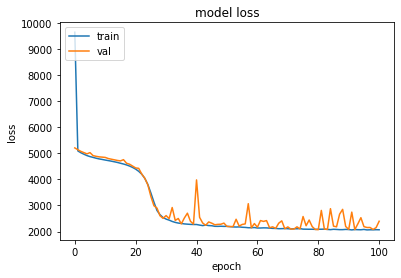

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

# Store the model in a pickel file

In [18]:
# from sklearn.externals import joblib 

# # Save the model as a pickle in a file 
# joblib.dump(model, 'trained_models\model_vmae_32.8461.pkl')

## Predict on new data  

In [34]:
pred = model.predict(test_data)

for i in range(len(pred)): 
    print(pred[i][0],"\t", test_labels[i])

243.79474 	 163
201.56818 	 162
184.18112 	 161
176.0331 	 160
183.1956 	 159
187.52632 	 158
184.32124 	 157
186.88625 	 156
188.9947 	 155
190.61977 	 154
192.33266 	 153
188.40111 	 152
190.33018 	 151
198.57454 	 150
199.13731 	 149
198.68752 	 148
201.1031 	 147
202.16344 	 146
201.63152 	 145
201.40593 	 144
198.1372 	 143
200.08835 	 142
199.49089 	 141
196.07095 	 140
193.2538 	 139
188.1108 	 138
186.19423 	 137
180.76714 	 136
177.02475 	 135
175.81926 	 134
175.35686 	 133
172.8705 	 132
173.80128 	 131
171.37779 	 130
170.08406 	 129
176.03456 	 128
177.50307 	 127
178.30742 	 126
181.74347 	 125
181.67021 	 124
184.82402 	 123
182.9383 	 122
181.57542 	 121
183.70476 	 120
184.57156 	 119
182.05 	 118
179.35793 	 117
179.25444 	 116
180.27554 	 115
179.65865 	 114
183.59859 	 113
182.77165 	 112
189.72311 	 111
193.79759 	 110
180.9618 	 109
182.65819 	 108
181.15291 	 107
178.39484 	 106
173.34227 	 105
167.88203 	 104
164.35184 	 103
160.80388 	 102
156.20287 	 101
156.7

156.87706 	 103
158.88222 	 102
157.61517 	 101
159.25511 	 100
164.85812 	 99
161.75505 	 98
165.70226 	 97
168.09082 	 96
173.56487 	 95
174.93367 	 94
170.0403 	 93
170.76073 	 92
171.91368 	 91
171.48676 	 90
170.31544 	 89
172.36235 	 88
172.29628 	 87
169.68617 	 86
163.06546 	 85
162.7454 	 84
167.20564 	 83
163.23158 	 82
163.8546 	 81
160.37383 	 80
156.04669 	 79
163.44157 	 78
155.45113 	 77
160.7971 	 76
163.31557 	 75
163.85464 	 74
157.26288 	 73
158.87105 	 72
154.05663 	 71
156.78781 	 70
158.68927 	 69
159.12881 	 68
156.4474 	 67
154.35362 	 66
154.58273 	 65
150.15547 	 64
151.2519 	 63
149.50078 	 62
148.7755 	 61
151.49327 	 60
151.57256 	 59
145.27313 	 58
146.17705 	 57
141.91765 	 56
141.0431 	 55
140.86975 	 54
141.75389 	 53
137.8475 	 52
138.4005 	 51
132.17293 	 50
129.86057 	 49
128.26854 	 48
128.55725 	 47
129.65523 	 46
124.268524 	 45
115.91785 	 44
112.904625 	 43
108.78712 	 42
105.556755 	 41
115.461555 	 40
113.32784 	 39
105.929146 	 38
101.90423 	

162.15266 	 105
163.45079 	 104
160.79752 	 103
158.2849 	 102
154.83519 	 101
153.61403 	 100
154.60565 	 99
160.23824 	 98
155.85841 	 97
157.11815 	 96
162.31865 	 95
163.65236 	 94
162.89867 	 93
160.54659 	 92
163.84637 	 91
167.86382 	 90
163.7128 	 89
158.86403 	 88
160.59572 	 87
154.31267 	 86
146.59245 	 85
145.45616 	 84
149.54437 	 83
150.3261 	 82
148.92201 	 81
144.62746 	 80
144.0964 	 79
142.69626 	 78
142.07056 	 77
142.02597 	 76
147.23 	 75
143.95995 	 74
138.70836 	 73
136.22655 	 72
137.40276 	 71
137.00195 	 70
140.61162 	 69
139.64351 	 68
139.0295 	 67
136.26332 	 66
130.99112 	 65
129.07205 	 64
128.5624 	 63
131.00104 	 62
125.150734 	 61
121.73716 	 60
106.04798 	 59
111.92121 	 58
108.91294 	 57
115.82105 	 56
121.851265 	 55
124.6732 	 54
127.93461 	 53
124.07584 	 52
131.05005 	 51
130.06047 	 50
131.49226 	 49
133.92236 	 48
134.05962 	 47
131.83893 	 46
130.49577 	 45
130.75838 	 44
130.57982 	 43
129.75969 	 42
118.69395 	 41
124.08483 	 40
129.21593 	 

146.31248 	 67
135.48785 	 66
131.94543 	 65
131.77202 	 64
131.06226 	 63
129.80078 	 62
144.27135 	 61
142.35207 	 60
134.97827 	 59
131.2458 	 58
132.3697 	 57
126.92117 	 56
124.07346 	 55
126.590935 	 54
131.23021 	 53
131.77858 	 52
128.8904 	 51
132.86101 	 50
133.11218 	 49
133.75471 	 48
133.48505 	 47
133.98856 	 46
131.35411 	 45
129.2936 	 44
126.13288 	 43
110.418304 	 42
120.39632 	 41
109.2886 	 40
109.51318 	 39
100.285904 	 38
87.54966 	 37
80.82635 	 36
92.05666 	 35
98.20992 	 34
94.30343 	 33
106.8924 	 32
94.725 	 31
96.859764 	 30
88.68756 	 29
103.09302 	 28
100.732544 	 27
101.577385 	 26
90.95753 	 25
84.80985 	 24
85.69509 	 23
69.06135 	 22
65.24856 	 21
61.14347 	 20
61.78137 	 19
59.16171 	 18
59.672825 	 17
52.645115 	 16
45.718258 	 15
36.404377 	 14
34.767105 	 13
33.735905 	 12
37.6222 	 11
35.982525 	 10
28.684256 	 9
20.82214 	 8
18.419163 	 7
18.903534 	 6
17.084066 	 5
14.50535 	 4
9.926802 	 3
8.58975 	 2
6.318464 	 1
5.223636 	 0
238.72668 	 174
2

114.10815 	 41
103.3334 	 40
99.06255 	 39
104.8083 	 38
102.88228 	 37
92.81749 	 36
98.54374 	 35
90.04714 	 34
106.14684 	 33
100.20739 	 32
100.6042 	 31
100.27917 	 30
104.5557 	 29
100.200615 	 28
110.413506 	 27
112.531944 	 26
104.376854 	 25
106.48803 	 24
93.43845 	 23
83.12552 	 22
88.37767 	 21
95.058266 	 20
84.80577 	 19
77.88577 	 18
69.111916 	 17
60.38252 	 16
63.429623 	 15
55.73078 	 14
45.053776 	 13
43.118782 	 12
31.619213 	 11
22.141184 	 10
21.518436 	 9
21.258774 	 8
17.548628 	 7
14.047275 	 6
10.919761 	 5
11.696999 	 4
17.585125 	 3
14.813961 	 2
12.392427 	 1
5.090678 	 0
175.62547 	 227
141.49452 	 226
124.9343 	 225
137.0685 	 224
132.55046 	 223
131.84828 	 222
136.29008 	 221
136.12656 	 220
137.9773 	 219
136.69043 	 218
140.46477 	 217
141.53255 	 216
141.2541 	 215
139.12099 	 214
145.62642 	 213
149.90013 	 212
150.32146 	 211
147.0671 	 210
148.00792 	 209
150.41273 	 208
151.00017 	 207
146.73631 	 206
146.17001 	 205
141.47496 	 204
135.59785 	 2

167.90703 	 65
174.85292 	 64
151.05588 	 63
142.14934 	 62
138.42595 	 61
138.34859 	 60
135.38548 	 59
134.16554 	 58
134.98216 	 57
131.90869 	 56
129.53093 	 55
128.37245 	 54
130.33968 	 53
132.55522 	 52
133.4682 	 51
131.98485 	 50
135.97469 	 49
134.13715 	 48
132.97145 	 47
132.64362 	 46
134.50124 	 45
132.39116 	 44
126.18366 	 43
121.309875 	 42
122.280556 	 41
129.02596 	 40
123.08462 	 39
113.29519 	 38
120.49502 	 37
115.23093 	 36
107.49741 	 35
116.97045 	 34
115.96232 	 33
109.14843 	 32
114.771095 	 31
94.62893 	 30
91.92704 	 29
83.412025 	 28
73.400444 	 27
79.231926 	 26
65.595406 	 25
51.958996 	 24
57.488113 	 23
57.01758 	 22
36.7247 	 21
41.308308 	 20
39.127605 	 19
47.01244 	 18
43.702206 	 17
36.875443 	 16
35.070923 	 15
36.46287 	 14
35.396225 	 13
31.221485 	 12
32.509953 	 11
36.22382 	 10
29.581268 	 9
27.755548 	 8
27.59911 	 7
22.27768 	 6
21.392197 	 5
18.736776 	 4
15.415213 	 3
13.9339075 	 2
15.712691 	 1
13.884062 	 0
232.40752 	 156
159.61368 	

128.38972 	 162
123.40771 	 161
128.13745 	 160
130.02368 	 159
131.24953 	 158
133.90996 	 157
135.1635 	 156
137.2861 	 155
142.56483 	 154
141.87111 	 153
139.76007 	 152
140.92345 	 151
142.84698 	 150
141.13217 	 149
144.14049 	 148
140.0761 	 147
141.32921 	 146
139.64882 	 145
134.76097 	 144
132.40013 	 143
129.9948 	 142
133.81317 	 141
126.93243 	 140
130.15569 	 139
130.35823 	 138
130.53288 	 137
131.90819 	 136
133.85506 	 135
135.62349 	 134
135.90381 	 133
140.63509 	 132
134.94807 	 131
138.78839 	 130
138.48286 	 129
138.79771 	 128
139.53578 	 127
139.79527 	 126
137.41231 	 125
139.33144 	 124
138.35733 	 123
133.07182 	 122
133.76431 	 121
131.2274 	 120
128.69514 	 119
120.663734 	 118
121.60097 	 117
117.150375 	 116
124.20862 	 115
117.01533 	 114
122.936 	 113
122.557976 	 112
126.90269 	 111
125.993126 	 110
123.71277 	 109
125.70858 	 108
127.201225 	 107
127.70388 	 106
128.7176 	 105
130.03967 	 104
128.65434 	 103
130.83125 	 102
131.00514 	 101
135.60066 	

142.36745 	 80
144.8457 	 79
150.31601 	 78
146.86208 	 77
153.9687 	 76
154.94182 	 75
154.35805 	 74
151.03722 	 73
150.76222 	 72
152.52136 	 71
149.60487 	 70
150.19432 	 69
146.16685 	 68
149.09784 	 67
145.12373 	 66
144.42894 	 65
144.08452 	 64
144.66357 	 63
145.57643 	 62
140.72375 	 61
138.73227 	 60
135.99812 	 59
142.39742 	 58
138.8639 	 57
137.42259 	 56
132.03596 	 55
129.18513 	 54
132.22491 	 53
133.36421 	 52
135.03186 	 51
135.1983 	 50
134.10616 	 49
132.14342 	 48
132.48174 	 47
132.81657 	 46
139.65117 	 45
139.81311 	 44
135.96187 	 43
137.71643 	 42
135.65634 	 41
133.0406 	 40
128.33408 	 39
123.82882 	 38
124.606636 	 37
117.22908 	 36
102.43696 	 35
102.68974 	 34
100.49775 	 33
82.21264 	 32
101.760155 	 31
81.83161 	 30
72.77694 	 29
73.1159 	 28
65.006905 	 27
66.95476 	 26
63.495735 	 25
66.248024 	 24
60.311596 	 23
55.70559 	 22
58.150856 	 21
58.647926 	 20
70.640724 	 19
57.59665 	 18
57.012814 	 17
47.83405 	 16
44.886227 	 15
32.643803 	 14
26.3932

182.4541 	 224
184.61641 	 223
181.10027 	 222
181.088 	 221
181.04597 	 220
179.7039 	 219
176.97105 	 218
177.39577 	 217
178.32799 	 216
179.39012 	 215
180.27571 	 214
180.90285 	 213
180.70299 	 212
176.07698 	 211
178.25409 	 210
180.76057 	 209
194.22638 	 208
198.65521 	 207
203.91246 	 206
201.83006 	 205
190.56831 	 204
186.08862 	 203
184.15611 	 202
190.67805 	 201
191.09618 	 200
194.47258 	 199
194.35133 	 198
191.72417 	 197
191.16922 	 196
190.32211 	 195
188.32106 	 194
185.87245 	 193
185.2311 	 192
181.48918 	 191
180.78014 	 190
180.72327 	 189
177.76282 	 188
182.2629 	 187
183.91252 	 186
189.85283 	 185
189.3246 	 184
192.14774 	 183
198.22911 	 182
199.66661 	 181
204.95128 	 180
203.46861 	 179
200.9981 	 178
199.33311 	 177
196.45705 	 176
194.51549 	 175
197.31075 	 174
196.73082 	 173
191.02095 	 172
189.94826 	 171
184.8857 	 170
185.5916 	 169
189.94345 	 168
185.21024 	 167
186.3652 	 166
186.27965 	 165
184.10121 	 164
183.57024 	 163
187.69542 	 162
183

141.39156 	 274
141.51134 	 273
149.21452 	 272
145.93382 	 271
143.9558 	 270
142.50658 	 269
145.00285 	 268
144.208 	 267
149.0392 	 266
152.03833 	 265
144.54193 	 264
141.45822 	 263
137.60152 	 262
139.69554 	 261
141.47238 	 260
142.32924 	 259
142.83073 	 258
138.84961 	 257
138.36305 	 256
139.55577 	 255
140.61778 	 254
139.4132 	 253
142.70425 	 252
142.08073 	 251
140.52144 	 250
139.72026 	 249
136.81949 	 248
137.5066 	 247
139.87102 	 246
137.70891 	 245
140.16142 	 244
141.96432 	 243
139.96317 	 242
141.69699 	 241
139.85478 	 240
144.87657 	 239
144.99081 	 238
144.6905 	 237
138.47551 	 236
143.02335 	 235
142.74974 	 234
141.18314 	 233
144.46712 	 232
140.24052 	 231
140.09923 	 230
139.76534 	 229
139.1378 	 228
138.6588 	 227
144.50232 	 226
141.90128 	 225
140.58243 	 224
140.04729 	 223
139.09148 	 222
140.00822 	 221
137.62428 	 220
134.61633 	 219
133.93976 	 218
133.10318 	 217
129.33861 	 216
129.2242 	 215
130.95854 	 214
130.38377 	 213
131.96135 	 212
13

148.93051 	 168
153.6055 	 167
155.29811 	 166
149.49246 	 165
147.83504 	 164
142.75987 	 163
144.18245 	 162
139.90466 	 161
138.49683 	 160
143.7356 	 159
145.09602 	 158
142.17299 	 157
141.82387 	 156
144.95898 	 155
144.94783 	 154
145.31306 	 153
140.17162 	 152
138.62196 	 151
136.74486 	 150
133.13853 	 149
136.29688 	 148
137.774 	 147
135.22353 	 146
136.23781 	 145
142.5838 	 144
141.94452 	 143
148.10498 	 142
148.5858 	 141
148.85735 	 140
151.61592 	 139
153.78374 	 138
152.89601 	 137
152.4062 	 136
146.94359 	 135
142.69633 	 134
147.71371 	 133
140.48097 	 132
140.22107 	 131
135.92953 	 130
134.9492 	 129
135.3768 	 128
138.81544 	 127
141.52538 	 126
146.58397 	 125
146.63538 	 124
142.14145 	 123
145.98347 	 122
146.82982 	 121
149.73662 	 120
150.03972 	 119
148.39429 	 118
149.32268 	 117
147.24626 	 116
145.16142 	 115
143.46138 	 114
142.76706 	 113
141.27657 	 112
143.10757 	 111
143.77127 	 110
139.93451 	 109
135.40799 	 108
129.5546 	 107
128.60886 	 106
12

127.400986 	 88
123.150536 	 87
124.04665 	 86
111.88074 	 85
116.80287 	 84
123.158035 	 83
127.079765 	 82
124.12919 	 81
115.77079 	 80
110.978065 	 79
122.53736 	 78
115.50001 	 77
120.392914 	 76
124.98827 	 75
116.24912 	 74
109.72005 	 73
110.16601 	 72
113.36846 	 71
109.92626 	 70
114.47593 	 69
105.01829 	 68
114.52953 	 67
100.85789 	 66
91.553825 	 65
105.25295 	 64
106.16018 	 63
104.28962 	 62
113.19522 	 61
114.157524 	 60
110.3292 	 59
105.1182 	 58
91.99296 	 57
94.78507 	 56
107.36842 	 55
91.36134 	 54
87.14707 	 53
74.73 	 52
69.53103 	 51
73.114655 	 50
61.19059 	 49
63.266624 	 48
58.91143 	 47
61.783527 	 46
51.34979 	 45
50.422226 	 44
46.159405 	 43
46.410236 	 42
45.11811 	 41
49.562855 	 40
57.66758 	 39
50.155613 	 38
59.32675 	 37
41.84615 	 36
37.278774 	 35
35.073364 	 34
42.405384 	 33
52.696102 	 32
44.742 	 31
36.2226 	 30
33.773235 	 29
37.4194 	 28
45.526134 	 27
53.567482 	 26
69.85882 	 25
71.74596 	 24
60.22875 	 23
40.257427 	 22
39.758545 	 21
3

143.2358 	 86
144.83073 	 85
146.84102 	 84
139.84062 	 83
145.09753 	 82
147.29866 	 81
147.44563 	 80
149.17647 	 79
147.45207 	 78
153.8209 	 77
155.2787 	 76
153.89677 	 75
157.57002 	 74
158.49591 	 73
152.47975 	 72
152.45201 	 71
148.42528 	 70
149.15414 	 69
147.1739 	 68
141.21028 	 67
138.98305 	 66
139.34764 	 65
136.19334 	 64
140.13979 	 63
140.83351 	 62
139.0804 	 61
137.59033 	 60
134.85088 	 59
135.2079 	 58
132.76938 	 57
128.37773 	 56
130.57603 	 55
130.60841 	 54
129.47798 	 53
129.89793 	 52
131.44328 	 51
133.2488 	 50
137.18864 	 49
137.16191 	 48
140.92784 	 47
145.19965 	 46
142.85474 	 45
145.2877 	 44
141.05292 	 43
138.72522 	 42
140.8013 	 41
141.60037 	 40
139.19498 	 39
135.66495 	 38
129.94981 	 37
116.00613 	 36
105.75464 	 35
100.20121 	 34
102.5412 	 33
117.45627 	 32
108.74675 	 31
82.154976 	 30
77.615395 	 29
69.70869 	 28
70.269356 	 27
66.33142 	 26
63.22736 	 25
56.94697 	 24
54.401073 	 23
53.84231 	 22
46.989048 	 21
39.79585 	 20
40.49119 	 

#####  Predefined model 

In [36]:
from sklearn.externals import joblib 

pr_model = joblib.load('trained_models\model_vmae_32.8461.pkl')
pred2 = model.predict(test_data)

for i in range(len(pred)): 
    print(pred[i][0],"\t", test_labels[i])


C:\Users\O136114O\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


243.79474 	 163
201.56818 	 162
184.18112 	 161
176.0331 	 160
183.1956 	 159
187.52632 	 158
184.32124 	 157
186.88625 	 156
188.9947 	 155
190.61977 	 154
192.33266 	 153
188.40111 	 152
190.33018 	 151
198.57454 	 150
199.13731 	 149
198.68752 	 148
201.1031 	 147
202.16344 	 146
201.63152 	 145
201.40593 	 144
198.1372 	 143
200.08835 	 142
199.49089 	 141
196.07095 	 140
193.2538 	 139
188.1108 	 138
186.19423 	 137
180.76714 	 136
177.02475 	 135
175.81926 	 134
175.35686 	 133
172.8705 	 132
173.80128 	 131
171.37779 	 130
170.08406 	 129
176.03456 	 128
177.50307 	 127
178.30742 	 126
181.74347 	 125
181.67021 	 124
184.82402 	 123
182.9383 	 122
181.57542 	 121
183.70476 	 120
184.57156 	 119
182.05 	 118
179.35793 	 117
179.25444 	 116
180.27554 	 115
179.65865 	 114
183.59859 	 113
182.77165 	 112
189.72311 	 111
193.79759 	 110
180.9618 	 109
182.65819 	 108
181.15291 	 107
178.39484 	 106
173.34227 	 105
167.88203 	 104
164.35184 	 103
160.80388 	 102
156.20287 	 101
156.7

108.78712 	 42
105.556755 	 41
115.461555 	 40
113.32784 	 39
105.929146 	 38
101.90423 	 37
92.281105 	 36
83.94138 	 35
108.34565 	 34
110.547905 	 33
104.692245 	 32
105.35753 	 31
105.07768 	 30
101.01236 	 29
100.69166 	 28
100.06983 	 27
107.22332 	 26
105.8974 	 25
91.23077 	 24
82.21367 	 23
72.286476 	 22
62.376724 	 21
40.48428 	 20
37.321087 	 19
40.172066 	 18
47.838207 	 17
42.168186 	 16
30.332882 	 15
29.425888 	 14
26.519218 	 13
22.97846 	 12
23.724163 	 11
21.647171 	 10
19.914837 	 9
15.458231 	 8
8.436544 	 7
8.006875 	 6
5.5324636 	 5
7.85844 	 4
8.434684 	 3
5.4669294 	 2
1.7766111 	 1
4.806367 	 0
224.8326 	 248
225.80019 	 247
212.73991 	 246
213.54323 	 245
215.98473 	 244
209.22878 	 243
207.14418 	 242
203.14592 	 241
206.80717 	 240
203.61418 	 239
201.66896 	 238
198.56065 	 237
200.11469 	 236
199.41116 	 235
192.19128 	 234
191.07689 	 233
193.40004 	 232
196.30217 	 231
193.2772 	 230
199.64793 	 229
197.11836 	 228
194.9742 	 227
193.37593 	 226
192.477

18.580904 	 0
173.95808 	 189
169.11748 	 188
147.75832 	 187
152.46175 	 186
147.98297 	 185
149.62363 	 184
150.08891 	 183
151.15837 	 182
149.80568 	 181
147.86615 	 180
143.14876 	 179
147.12065 	 178
150.55116 	 177
151.25682 	 176
155.82811 	 175
153.54839 	 174
151.46446 	 173
151.98409 	 172
155.0314 	 171
155.71532 	 170
158.90552 	 169
153.21277 	 168
150.39058 	 167
153.34404 	 166
152.99211 	 165
154.66241 	 164
154.40529 	 163
153.93724 	 162
151.5772 	 161
151.48836 	 160
150.30237 	 159
152.18506 	 158
153.65712 	 157
152.54324 	 156
146.83113 	 155
153.34647 	 154
158.56717 	 153
157.43811 	 152
155.19511 	 151
154.98428 	 150
156.31284 	 149
157.39073 	 148
152.40987 	 147
151.32089 	 146
156.0642 	 145
151.64958 	 144
143.34155 	 143
146.28833 	 142
150.11278 	 141
148.56047 	 140
147.74431 	 139
148.84538 	 138
146.69896 	 137
142.55836 	 136
139.33055 	 135
139.63298 	 134
140.93689 	 133
138.50728 	 132
139.20497 	 131
138.64156 	 130
137.14088 	 129
136.95781 	 1

56.048183 	 14
47.18404 	 13
44.43055 	 12
37.019577 	 11
34.38529 	 10
35.4229 	 9
28.58236 	 8
22.445156 	 7
21.605658 	 6
20.750418 	 5
16.707766 	 4
15.359268 	 3
11.126391 	 2
8.814874 	 1
5.3819823 	 0
202.38774 	 224
172.75117 	 223
164.59259 	 222
156.15273 	 221
152.8965 	 220
154.60628 	 219
151.82608 	 218
155.99307 	 217
153.25032 	 216
151.85078 	 215
152.02798 	 214
152.33003 	 213
148.71696 	 212
147.687 	 211
152.86055 	 210
153.72334 	 209
155.56029 	 208
167.44771 	 207
159.62633 	 206
162.21066 	 205
162.75772 	 204
159.4899 	 203
159.50017 	 202
164.10449 	 201
157.08644 	 200
157.93446 	 199
158.09775 	 198
153.6442 	 197
149.73222 	 196
151.37938 	 195
153.48717 	 194
154.34532 	 193
159.78197 	 192
158.91173 	 191
158.66676 	 190
160.52946 	 189
161.3041 	 188
162.8885 	 187
163.97762 	 186
158.8954 	 185
158.45503 	 184
156.93764 	 183
154.04909 	 182
151.55988 	 181
155.41893 	 180
153.65205 	 179
151.22163 	 178
154.8471 	 177
157.90623 	 176
164.88795 	 175
1

130.3802 	 161
130.1715 	 160
129.36116 	 159
127.27265 	 158
123.17191 	 157
119.024376 	 156
121.28894 	 155
124.08658 	 154
124.05456 	 153
130.49202 	 152
132.22182 	 151
134.22948 	 150
135.86464 	 149
134.10747 	 148
133.62798 	 147
133.1874 	 146
128.45352 	 145
128.65306 	 144
132.91634 	 143
126.4596 	 142
117.51116 	 141
114.37771 	 140
108.62495 	 139
115.743546 	 138
115.33179 	 137
114.23019 	 136
111.48551 	 135
113.73385 	 134
110.101715 	 133
121.073524 	 132
117.42672 	 131
125.75018 	 130
131.08626 	 129
128.46864 	 128
127.5438 	 127
131.87791 	 126
135.61333 	 125
134.63414 	 124
128.83519 	 123
118.29072 	 122
120.86663 	 121
116.195 	 120
100.521904 	 119
100.116104 	 118
102.70495 	 117
92.201775 	 116
86.81025 	 115
88.300896 	 114
102.100395 	 113
109.73574 	 112
110.63174 	 111
112.52512 	 110
125.90933 	 109
129.50514 	 108
130.99333 	 107
136.76213 	 106
135.78828 	 105
139.15646 	 104
134.4833 	 103
133.03326 	 102
132.06215 	 101
127.24114 	 100
126.84011 

126.33782 	 200
124.375336 	 199
123.85821 	 198
126.01036 	 197
127.948875 	 196
123.893486 	 195
128.89359 	 194
129.57613 	 193
129.99171 	 192
128.16357 	 191
128.5396 	 190
134.45885 	 189
135.541 	 188
132.88986 	 187
133.9882 	 186
136.83736 	 185
133.02003 	 184
133.18852 	 183
134.30357 	 182
131.42671 	 181
136.4799 	 180
129.59277 	 179
128.0021 	 178
130.39175 	 177
127.75077 	 176
126.215965 	 175
124.02882 	 174
129.47885 	 173
128.61787 	 172
126.53568 	 171
122.09435 	 170
127.98037 	 169
128.08553 	 168
124.3116 	 167
121.78643 	 166
126.365074 	 165
126.802795 	 164
126.826 	 163
127.2971 	 162
130.27127 	 161
127.14009 	 160
120.528404 	 159
127.483955 	 158
130.13387 	 157
133.10356 	 156
129.9082 	 155
128.67189 	 154
126.67977 	 153
126.87542 	 152
123.62972 	 151
126.54033 	 150
125.703964 	 149
127.18336 	 148
127.57349 	 147
129.77309 	 146
127.741905 	 145
128.49268 	 144
130.82945 	 143
131.15273 	 142
132.90195 	 141
133.57358 	 140
132.921 	 139
129.95775 	

163.51106 	 94
153.7691 	 93
153.50862 	 92
148.63506 	 91
153.22316 	 90
152.48491 	 89
153.71434 	 88
155.80246 	 87
160.84889 	 86
162.15752 	 85
163.23076 	 84
164.53337 	 83
166.68774 	 82
169.43034 	 81
168.84514 	 80
163.85435 	 79
167.68645 	 78
167.49666 	 77
165.35359 	 76
168.43713 	 75
171.94012 	 74
169.1786 	 73
166.84993 	 72
160.13345 	 71
160.37996 	 70
164.77391 	 69
158.98166 	 68
156.67278 	 67
157.16783 	 66
152.33244 	 65
148.74529 	 64
150.19673 	 63
150.24701 	 62
154.38683 	 61
152.69942 	 60
149.10252 	 59
152.96239 	 58
149.6046 	 57
144.00209 	 56
145.58534 	 55
140.79778 	 54
134.30498 	 53
133.50255 	 52
130.32547 	 51
130.58745 	 50
129.47876 	 49
128.25566 	 48
128.83391 	 47
128.71172 	 46
131.02715 	 45
133.44067 	 44
134.02956 	 43
135.76146 	 42
138.76344 	 41
134.57866 	 40
132.26613 	 39
129.1506 	 38
130.92393 	 37
132.04878 	 36
131.7849 	 35
129.42953 	 34
129.48787 	 33
123.36985 	 32
119.19833 	 31
119.42373 	 30
125.649734 	 29
118.34438 	 28

70.88105 	 49
72.54685 	 48
81.9551 	 47
82.5841 	 46
63.293324 	 45
55.219578 	 44
51.137085 	 43
51.065998 	 42
51.58427 	 41
50.5012 	 40
54.78298 	 39
58.27576 	 38
41.96159 	 37
36.949287 	 36
37.44472 	 35
45.28738 	 34
47.93169 	 33
45.02582 	 32
46.028088 	 31
44.65698 	 30
36.250538 	 29
39.06769 	 28
41.29061 	 27
41.51411 	 26
46.52541 	 25
43.363594 	 24
34.577095 	 23
40.120228 	 22
35.789387 	 21
38.826572 	 20
37.72073 	 19
34.26092 	 18
28.494816 	 17
25.022 	 16
18.275852 	 15
18.943115 	 14
19.460644 	 13
13.4273205 	 12
14.84441 	 11
11.859813 	 10
10.017205 	 9
7.795297 	 8
5.5968647 	 7
9.51322 	 6
11.022171 	 5
8.465355 	 4
9.192356 	 3
12.968348 	 2
14.887188 	 1
13.031477 	 0
203.57191 	 142
180.78622 	 141
162.64574 	 140
159.54353 	 139
161.80174 	 138
155.77126 	 137
160.01503 	 136
162.6156 	 135
164.88124 	 134
163.09523 	 133
165.48344 	 132
165.16243 	 131
168.75356 	 130
173.7502 	 129
176.3798 	 128
174.48172 	 127
171.06482 	 126
165.39287 	 125
162.84

107.66138 	 94
109.325294 	 93
113.55695 	 92
109.22137 	 91
108.44071 	 90
120.6835 	 89
119.94715 	 88
113.853424 	 87
121.084236 	 86
113.04453 	 85
109.251854 	 84
110.59443 	 83
114.169136 	 82
122.95544 	 81
119.23145 	 80
117.06457 	 79
107.6077 	 78
105.09683 	 77
103.48473 	 76
97.13239 	 75
91.891174 	 74
90.45779 	 73
88.519066 	 72
75.02114 	 71
76.32134 	 70
67.16113 	 69
79.07733 	 68
84.66247 	 67
98.02028 	 66
100.9551 	 65
98.22733 	 64
92.91825 	 63
99.049065 	 62
99.39829 	 61
103.74675 	 60
97.55106 	 59
85.27115 	 58
90.38586 	 57
84.00176 	 56
87.85378 	 55
82.184135 	 54
75.9933 	 53
54.008984 	 52
54.930553 	 51
52.172413 	 50
48.64898 	 49
59.46902 	 48
46.418346 	 47
42.665886 	 46
36.1695 	 45
33.925774 	 44
37.093494 	 43
46.39919 	 42
44.807713 	 41
44.453114 	 40
40.886986 	 39
38.47834 	 38
36.7796 	 37
36.331623 	 36
35.63166 	 35
40.44495 	 34
37.423485 	 33
35.92796 	 32
30.541943 	 31
27.871292 	 30
29.294716 	 29
31.01873 	 28
35.62939 	 27
34.21698 

105.8218 	 47
119.68816 	 46
119.25143 	 45
118.77273 	 44
107.11412 	 43
119.84091 	 42
110.256935 	 41
104.452934 	 40
100.29787 	 39
95.65423 	 38
103.471954 	 37
99.50083 	 36
95.90005 	 35
97.960686 	 34
92.26703 	 33
79.791725 	 32
83.1892 	 31
85.75916 	 30
72.8753 	 29
73.09327 	 28
53.60133 	 27
40.8066 	 26
43.729168 	 25
40.25918 	 24
42.324146 	 23
44.63845 	 22
53.93918 	 21
54.62911 	 20
58.82372 	 19
42.973164 	 18
39.537624 	 17
38.55838 	 16
35.695507 	 15
36.780735 	 14
32.611584 	 13
26.814388 	 12
25.724068 	 11
23.156338 	 10
20.910784 	 9
26.526234 	 8
26.985718 	 7
25.172092 	 6
26.367798 	 5
24.604233 	 4
26.389172 	 3
26.442093 	 2
22.745495 	 1
22.192978 	 0
174.81737 	 146
185.56364 	 145
164.1675 	 144
158.29362 	 143
157.08995 	 142
161.22325 	 141
157.18872 	 140
155.36552 	 139
152.33708 	 138
152.28871 	 137
147.72652 	 136
147.31346 	 135
149.40176 	 134
151.73848 	 133
149.1886 	 132
148.79921 	 131
151.90828 	 130
153.27559 	 129
153.29152 	 128
151.8

113.9076 	 130
116.6465 	 129
113.31145 	 128
115.611824 	 127
123.79438 	 126
134.38045 	 125
134.488 	 124
134.10222 	 123
133.01363 	 122
132.23387 	 121
133.12132 	 120
135.94841 	 119
133.37337 	 118
136.60355 	 117
128.2923 	 116
118.286446 	 115
109.0411 	 114
117.3747 	 113
121.76534 	 112
125.878685 	 111
124.02281 	 110
112.16802 	 109
108.62632 	 108
98.8445 	 107
101.667244 	 106
107.474174 	 105
110.52892 	 104
102.48466 	 103
95.06255 	 102
96.36616 	 101
91.288536 	 100
93.09113 	 99
101.9072 	 98
100.6887 	 97
103.591774 	 96
99.83144 	 95
100.676796 	 94
104.658 	 93
99.89399 	 92
113.43989 	 91
117.72539 	 90
124.345894 	 89
122.70956 	 88
128.23224 	 87
127.98565 	 86
125.31429 	 85
127.72964 	 84
132.20743 	 83
130.46904 	 82
125.799065 	 81
120.05811 	 80
109.48951 	 79
115.46869 	 78
105.48742 	 77
103.106415 	 76
106.66691 	 75
99.09554 	 74
95.08404 	 73
104.84644 	 72
102.74409 	 71
111.00828 	 70
105.07669 	 69
89.61199 	 68
86.40534 	 67
80.31944 	 66
83.1016

134.14246 	 83
133.33157 	 82
133.67354 	 81
127.675186 	 80
128.0886 	 79
132.28703 	 78
132.09529 	 77
127.97077 	 76
128.26814 	 75
127.80837 	 74
127.19727 	 73
125.41721 	 72
127.95129 	 71
127.86327 	 70
128.56842 	 69
123.74758 	 68
122.75364 	 67
125.311195 	 66
130.37758 	 65
125.794075 	 64
116.46961 	 63
115.303795 	 62
103.91099 	 61
104.24589 	 60
100.9228 	 59
108.974495 	 58
109.155945 	 57
108.83001 	 56
102.68685 	 55
89.92254 	 54
96.7623 	 53
86.01017 	 52
94.75913 	 51
97.21621 	 50
102.17728 	 49
91.93555 	 48
88.092545 	 47
87.852455 	 46
97.737144 	 45
100.12888 	 44
100.79716 	 43
101.62731 	 42
87.95383 	 41
72.254326 	 40
70.20796 	 39
73.57051 	 38
86.62301 	 37
95.17806 	 36
95.884224 	 35
96.485115 	 34
84.77315 	 33
94.35619 	 32
91.71239 	 31
88.07397 	 30
73.59303 	 29
59.112667 	 28
53.96053 	 27
39.665726 	 26
32.552967 	 25
29.33643 	 24
33.948788 	 23
27.038155 	 22
26.955576 	 21
24.969536 	 20
22.997139 	 19
23.388037 	 18
19.796698 	 17
20.727081 

# Visualisation

In [20]:
# -------- TO CHECK --------------

def plotUnitLines(y_pred, startUnit, endUnit, ncols=4, title='', figsize=[15, 15]):
    nunits = endUnit - startUnit + 1
    nrows = math.ceil(nunits/ncols)
    fig, axes=plt.subplots(nrows=nrows, ncols=ncols, clear=True, figsize=figsize)
    for unit in range(startUnit, endUnit+1):
        unitBooleanIndexes = testset0['unit']==unit;
        unit_pred = list(map(lambda x: x[0], y_pred[unitBooleanIndexes]))
        length = len(unit_pred)
        #Get the rul for each unit based on its unit boolean index
        y_rul = y_test0[unitBooleanIndexes].values
        mse = mean_squared_error(y_rul, unit_pred)
        x = range(len(unit_pred))
        rowIndex = math.floor((unit-startUnit)/ncols)
        colIndex = (unit-startUnit)%ncols;
        ax = axes[rowIndex, colIndex]
        ax.plot(x, unit_pred, label= 'predicted')
        ax.plot(x, y_rul, label='actual')
        ax.set_title('Unit'+str(unit) + ', MSE: '+str(mse))
        ax.legend()
    fig.tight_layout()
    plt.show()

In [21]:
# -------- TO CHECK --------------

def plotUnitLines(y_pred, startUnit, endUnit, ncols=4, title='', figsize=[15, 15]):
    nunits = endUnit - startUnit + 1
    nrows = math.ceil(nunits/ncols)
    fig, axes=plt.subplots(nrows=nrows, ncols=ncols, clear=True, figsize=figsize)
    for unit in range(startUnit, endUnit+1):
        unitBooleanIndexes = testset0['unit']==unit;
        unit_pred = list(map(lambda x: x[0], y_pred[unitBooleanIndexes]))
        length = len(unit_pred)
        #Get the rul for each unit based on its unit boolean index
        y_rul = y_test0[unitBooleanIndexes].values
        mse = mean_squared_error(y_rul, unit_pred)
        x = range(len(unit_pred))
        rowIndex = math.floor((unit-startUnit)/ncols)
        colIndex = (unit-startUnit)%ncols;
        ax = axes[rowIndex, colIndex]
        ax.plot(x, unit_pred, label= 'predicted')
        ax.plot(x, y_rul, label='actual')
        ax.set_title('Unit'+str(unit) + ', MSE: '+str(mse))
        ax.legend()
    fig.tight_layout()
    plt.show()